In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
os.chdir("E:\\FORE\\Term 2\\Python\\datasetsandcodefilesfortodaysclasssession18")
hpi_df = pd.read_csv("hpi_data_countries.tsv", sep='\t')

In [31]:
hpi_df.shape
hpi_df.head()

,HPI Rank,Country,Region,Life Expectancy (years),Wellbeing (0-10),Inequality of outcomes,Ecological Footprint (gha/capita),Happy Planet Index
0,1,Costa Rica,Americas,79.1,7.3,15%,2.8,44.7
1,2,Mexico,Americas,76.4,7.3,19%,2.9,40.7
2,3,Colombia,Americas,73.7,6.4,24%,1.9,40.7
3,4,Vanuatu,Asia Pacific,71.3,6.5,22%,1.9,40.6
4,5,Vietnam,Asia Pacific,75.5,5.5,19%,1.7,40.3


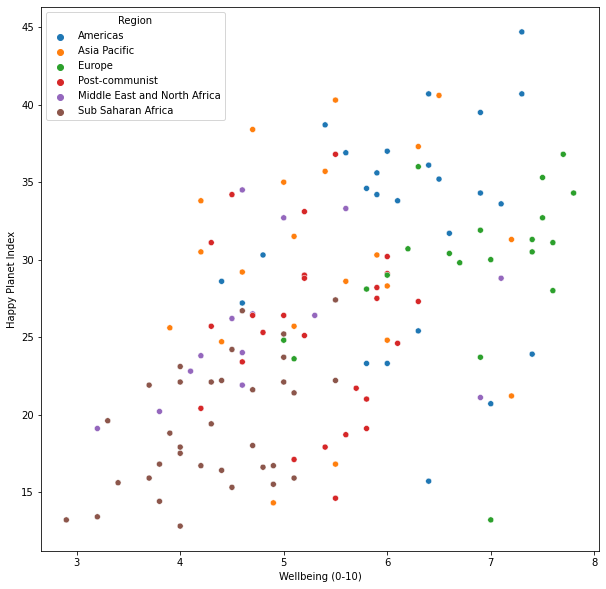

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))

ax = fig.add_subplot(111)
ax = sns.scatterplot(x='Wellbeing (0-10)', y='Happy Planet Index', hue='Region', data=hpi_df)
plt.show()

In [6]:
pip install altair vega_datasets

Note: you may need to restart the kernel to use updated packages.


In [37]:

import altair as alt


In [38]:
alt.Chart(hpi_df).mark_circle().encode(
x='Wellbeing (0-10):Q',
y='Happy Planet Index:Q',
color='Region:N',
).interactive()

alt.Chart(...)

In [9]:
# Exploring select and high functionality on a scatter plot
selected_area = alt.selection_interval()
alt.Chart(hpi_df).mark_circle().encode(
x='Wellbeing (0-10):Q',
y='Happy Planet Index:Q',
color='Region:N'
).add_selection(
selected_area
)

alt.Chart(...)

In [10]:
# Add alt_value as lightgray to gray out all points outside of the selection 
selected_area = alt.selection_interval()
alt.Chart(hpi_df).mark_circle().encode(
x='Wellbeing (0-10):Q',
y='Happy Planet Index:Q',
color=alt.condition(selected_area, 'Region:N', alt.
value('lightgray'))
).add_selection(
selected_area
)

alt.Chart(...)

In [11]:
# Add the tooltip function
selected_area = alt.selection_interval()
alt.Chart(hpi_df).mark_circle().encode(
x='Wellbeing (0-10):Q',
y='Happy Planet Index:Q',
color=alt.condition(selected_area, 'Region:N', alt.
value('lightgray')),
tooltip= ['Country', 'Region', 'Wellbeing (0-10)', 'Happy Planet Index', 'Life Expectancy (years)']
).interactive().add_selection(
selected_area
)

alt.Chart(...)

In [12]:
# multiple altair charts placed one after the other
chart = alt.Chart(hpi_df).mark_circle().encode(
y='Happy Planet Index',
color='Region:N'
)
chart1 = chart.encode(x='Wellbeing (0-10)')
chart2 = chart.encode(x='Life Expectancy (years)')
alt.vconcat(chart1, chart2)

alt.VConcatChart(...)

In [13]:
# Selection based on the values of a feature

input_dropdown = alt.binding_select(options=list(set(hpi_df.Region)))
selected_points = alt.selection_single(fields=['Region'], bind=input_dropdown, name='Select')
color = alt.condition(selected_points,
alt.Color('Region:N'),
alt.value('lightgray'))
alt.Chart(hpi_df).mark_circle().encode(
x='Wellbeing (0-10):Q',
y='Happy Planet Index:Q',
color=color,
tooltip='Region:N'
).add_selection(
selected_points
)

alt.Chart(...)

In [2]:
hpi_df.head()

NameError: name 'hpi_df' is not defined

In [14]:
alt.Chart(hpi_df).mark_bar().encode(
x='Region:N',
y='mean(Happy Planet Index):Q',
)

alt.Chart(...)

In [15]:
alt.Chart(hpi_df).mark_bar().encode(
x='Region:N',
y='mean(Happy Planet Index):Q',
).properties(width=400)

alt.Chart(...)

In [16]:

alt.Chart(hpi_df).mark_bar().encode(
x='Region:N',
y='mean(Happy Planet Index):Q',
).properties(width=400).interactive()

alt.Chart(...)

In [17]:
bars = alt.Chart(hpi_df).mark_bar().encode(
x='Region:N',
y='mean(Happy Planet Index):Q',
).properties(width=400)
line = alt.Chart(hpi_df).mark_rule(color='firebrick').encode(
y='mean(Happy Planet Index):Q',
size=alt.SizeValue(3)
)
bars | line

alt.HConcatChart(...)

In [18]:
bars = alt.Chart().mark_bar().encode(
x='Region:N',
y='mean(Happy Planet Index):Q',
).properties(width=400)
line = alt.Chart().mark_rule(color='firebrick').encode(
y='mean(Happy Planet Index):Q',
size=alt.SizeValue(3)
)
alt.layer(bars, line, data=hpi_df)

alt.LayerChart(...)

In [19]:
# Static heatmap
alt.Chart(hpi_df).mark_rect().encode(
alt.X('Happy Planet Index:Q', bin=True),
alt.Y('Wellbeing (0-10):Q', bin=True),
alt.Color('count()',
scale=alt.Scale(scheme='greenblue'),
legend=alt.Legend(title='Total Countries')
)
)

alt.Chart(...)

In [20]:
# interactive heatmap
alt.Chart(hpi_df).mark_rect().encode(
alt.X('Happy Planet Index:Q', bin=True),
alt.Y('Wellbeing (0-10):Q', bin=True),
alt.Color('count()',
scale=alt.Scale(scheme='greenblue'),
legend=alt.Legend(title='Total Countries')
)
).interactive()

alt.Chart(...)

In [21]:
# heatmap+circles
heatmap = alt.Chart(hpi_df).mark_rect().encode(
alt.X('Happy Planet Index:Q', bin=True),
alt.Y('Wellbeing (0-10):Q', bin=True)
)
circles = heatmap.mark_point().encode(
alt.ColorValue('lightgray'),
alt.Size('count()',
legend=alt.Legend(title='Records in Selection')
)
)
heatmap + circles

alt.LayerChart(...)

In [22]:
# Bar Plot and heatmap next to each other

#Merge the code to place the bar chart and heatmap next to each other.
bars = alt.Chart(hpi_df).mark_bar().encode(
    x='Region:N',
    y='count():Q',
).properties(width=350)

heatmap = alt.Chart(hpi_df).mark_rect().encode(
    alt.X('Wellbeing (0-10):Q', bin=True),
    alt.Y('Life Expectancy (years):Q', bin=True),
    alt.Color('count()',
        scale=alt.Scale(scheme='greenblue'),
        legend=alt.Legend(title='Total Countries')
    )
).properties(width=350)

bars | heatmap

alt.HConcatChart(...)

Dynamically linking a bar plt and a heatmap

In [23]:
# Select the region 
selected_region = alt.selection(type="single", encodings=['x'])

heatmap = alt.Chart(hpi_df).mark_rect().encode(
    alt.X('Wellbeing (0-10):Q', bin=True),
    alt.Y('Life Expectancy (years):Q', bin=True),
    alt.Color('count()',
        scale=alt.Scale(scheme='greenblue'),
        legend=alt.Legend(title='Total Countries')
    )
).properties(
    width=350
)


In [24]:
#Place the circles
circles = heatmap.mark_point().encode(
    alt.ColorValue('grey'),
    alt.Size('count()',
        legend=alt.Legend(title='Records in Selection')
    )
).transform_filter(
    selected_region
)


In [25]:
#Place the bars
bars = alt.Chart(hpi_df).mark_bar().encode(
    x='Region:N',
    y='count()',
    color=alt.condition(selected_region, alt.ColorValue("steelblue"), alt.ColorValue("grey"))
).properties(
    width=350
).add_selection(selected_region)

heatmap + circles | bars


alt.HConcatChart(...)

In [1]:
hpi_df.dtypes

NameError: name 'hpi_df' is not defined